#### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ
ÌåêÎã§Ïä§ Î≤ÑÏ†Ñ : 1.3.4<br>
ÎÑòÌååÏù¥ Î≤ÑÏ†Ñ : 1.21.5<br>
kiwipiepy Î≤ÑÏ†Ñ : 0.17.0<br>
seaborn Î≤ÑÏ†Ñ : 0.11.2<br>
konlpy Î≤ÑÏ†Ñ : 0.6.0

In [1]:
#1Ïû•ÏóêÏÑú konlpyÎ•º ÏÑ§ÏπòÌïòÏßÄ ÏïäÏïòÎã§Î©¥ ÏïÑÎûò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÍ≥†, ÏÑ§ÏπòÌï¥Ï£ºÏÑ∏Ïöî.
#1Ïû•ÏóêÏÑú ÏÑ§ÏπòÌñàÎã§Î©¥ Ìå®Ïä§Ìï©ÎãàÎã§.
#!pip install konlpy==0.6.0

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏù¥ ÎßûÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ ÏïÑÎûò Î™ÖÎ†πÏñ¥Ïùò Ï£ºÏÑùÏùÑ Ï†úÍ±∞Ìïú ÌõÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.
# Ïù¥Ï†Ñ ÏòàÏ†úÎì§ÏùÑ Ïã§ÌñâÌñàÎã§Î©¥ ÏïûÏóêÏÑú Ïù¥ÎØ∏ Î≤ÑÏ†ÑÏùÑ ÎßûÏ∑ÑÏäµÎãàÎã§.
# !pip install pandas==1.3.4
# !pip install numpy==1.21.5
# !pip install seaborn=0.11.2
# !pip install kiwipiepy==0.17.0

In [3]:
# Î≤ÑÏ†Ñ ÌôïÏù∏Ïö©
import pandas as pd
import numpy as np
import kiwipiepy
import seaborn as sns
import konlpy

print("ÌåêÎã§Ïä§ Î≤ÑÏ†Ñ :", pd.__version__)
print("ÎÑòÌååÏù¥ Î≤ÑÏ†Ñ:", np.__version__)
print("kiwipiepy Î≤ÑÏ†Ñ :", kiwipiepy.__version__)
print("seaborn Î≤ÑÏ†Ñ :", sns.__version__)
print("konlpy Î≤ÑÏ†Ñ :", konlpy.__version__)

ÌåêÎã§Ïä§ Î≤ÑÏ†Ñ : 1.3.4
ÎÑòÌååÏù¥ Î≤ÑÏ†Ñ: 1.21.5
kiwipiepy Î≤ÑÏ†Ñ : 0.17.0
seaborn Î≤ÑÏ†Ñ : 0.11.2
konlpy Î≤ÑÏ†Ñ : 0.6.0


ÌïÑÏöîÎûÄ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [4]:
import re

import pandas as pd
import numpy as np

from kiwipiepy import Kiwi
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import calendar
from dateutil.parser import parse

from collections import Counter
from konlpy.tag import Komoran, Okt, Twitter
from pprint import pprint

In [5]:
filepath = './data'
df = pd.read_excel(filepath + "/2Ïû•_Ïó¨ÏÑ±Ïª§ÎÆ§ÎãàÌã∞Îç∞Ïù¥ÌÑ∞.xlsx")

In [6]:
df.head()

title  replys views         date
0  Í∞ïÎÇ®Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ≤¥ÏÇ¥ÎπºÍ∏∞ ÏÖÄÎ£∞ÎùºÏù¥Ìä∏ Ï†úÍ±∞Î∂ÄÌÑ∞ ÌôïÏã§Ìûà ÎùºÏù∏Ïù¥ Îã¨ÎùºÏ°åÏñ¥Ïöî       2   391  2022.04.05.
1     Î∞úÎ†åÌã∞ÎÖ∏ Ïø†ÏÖòÍ≥º ÏûÖÏÉùÎ°úÎûë Ïø†ÏÖò ÎëêÍ∞ú Îã§ Ïç® Î≥¥Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî?       1   162  2022.04.05.
2                           ÎààÏçπ Î∞òÏòÅÍ∑ú Í∂ÅÍ∏àÌï¥Ïöî!       8    87  2022.04.05.
3                                ÌïÑÌÖå Ìó¨Ïä§Î≥ëÌñâ       4    90  2022.04.05.
4                        ÎÇ®Ìé∏ ÌîºÎ∂ÄÍ¥ÄÎ¶¨ Ìï¥Ï£ºÏãúÎäî Î∂ÑÎì§      10   109  2022.04.05.

Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù -Í≤åÏãúÎ¨º ÎÇ†Ïßú Ï†ïÎ≥¥ Íµ¨ÌïòÍ∏∞

In [7]:
date_sample = "2022.02.26"

print(parse(date_sample).year)#‚ë† # Ïó∞ÎèÑÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.
print(parse(date_sample).month)#‚ë° # ÏõîÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
print(parse(date_sample).day)#‚ë¢ # ÏùºÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§

2022
2
26


In [8]:
df['year'] = df['date'].apply(lambda x:parse(x).year) # ‚ë†
df['month'] = df['date'].apply(lambda x:parse(x).month)
df['day'] = df['date'].apply(lambda x:parse(x).day)

In [9]:
# 2022ÎÖÑ 2Ïõî 26Ïùº Ïù¥ÎùºÎ©¥
calendar.weekday(2022, 2, 26) # ‚ë† ÏöîÏùºÏ∞æÍ∏∞

5

In [10]:
posting_days = [] #ÏöîÏùº Ï†ïÎ≥¥ Ï†ÄÏû•
for y, m, d in zip(df['year'], df['month'], df['day']): # ‚ë†
    days = ['ÏõîÏöîÏùº','ÌôîÏöîÏùº','ÏàòÏöîÏùº','Î™©ÏöîÏùº','Í∏àÏöîÏùº','ÌÜ†ÏöîÏùº','ÏùºÏöîÏùº']
    day = days[calendar.weekday(y, m, d)] # ‚ë°
    posting_days.append(day) # ‚ë¢

df['Date_Created'] = posting_days # ‚ë£

In [11]:
df.sample(5)

title  replys views         date  year  month  \
16313              ÏóÑÎßàÍ∞Ä ÏßëÏóêÏÑú Ïö¥ÎèôÌïòÏãúÎäîÎç∞      11   198  2019.01.08.  2019      1   
12254           ÏÑ§ÌôîÏàò Î∞©ÌåêÌïòÏãúÎäîÎ∂Ñ Í≥ÑÏã†Í∞ÄÏöîÏò§?       0    89  2019.05.14.  2019      5   
3389   ÌôòÏ†àÍ∏∞ ÎëêÌîº Í∞ÅÏßàÍ≥†ÎØº... Ìï¥Í≤∞Î≤ï Ï¢Ä ÏïåÎ†§Ï£ºÏÑ∏Ïöî       6   165  2021.04.27.  2021      4   
2555                 Î≤àÏßÄÌîºÏßÄÏò§ ÌïòÏãúÎäîÎ∂ÑÎì§~       4   230  2021.07.18.  2021      7   
4964            ÏÉ¨ÎûëÎìúÌååÎ¶¨ ÏïÑÏù¥Îîî ÏûàÏúºÏã† Î∂Ñ~'       1   106  2020.12.02.  2020     12   

       day Date_Created  
16313    8          ÌôîÏöîÏùº  
12254   14          ÌôîÏöîÏùº  
3389    27          ÌôîÏöîÏùº  
2555    18          ÏùºÏöîÏùº  
4964     2          ÏàòÏöîÏùº

In [12]:
df['month'].value_counts().sort_index()

1     2117
2     1969
3     2184
4     1724
5     1304
6     1165
7     1149
8     1108
9      950
10     971
11    1021
12     997
Name: month, dtype: int64

In [13]:
df['month'].value_counts()

3     2184
1     2117
2     1969
4     1724
5     1304
6     1165
7     1149
8     1108
11    1021
12     997
10     971
9      950
Name: month, dtype: int64

In [14]:
df['Date_Created'].value_counts()

ÌôîÏöîÏùº    2981
ÏõîÏöîÏùº    2880
Î™©ÏöîÏùº    2792
ÏàòÏöîÏùº    2652
Í∏àÏöîÏùº    2580
ÏùºÏöîÏùº    1459
ÌÜ†ÏöîÏùº    1315
Name: Date_Created, dtype: int64

(0.0, 2500.0)

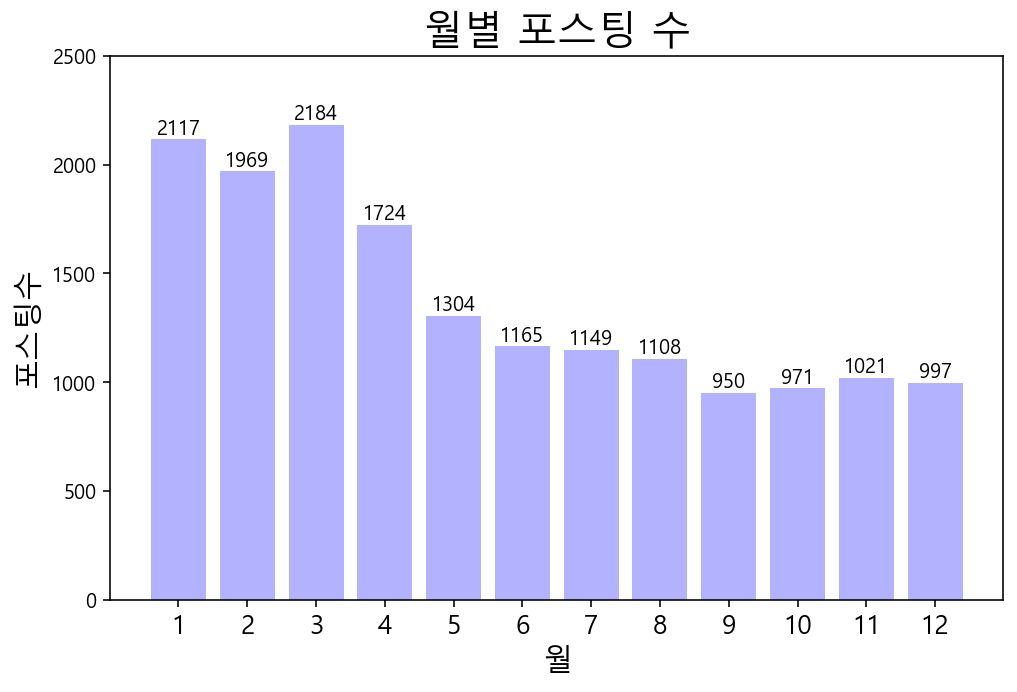

In [15]:
y = df['month'].value_counts().sort_index().values # ‚ë†
x = np.arange(1,13)

plt.figure(figsize=(8, 5)) # ‚ë°
plt.title("ÏõîÎ≥Ñ Ìè¨Ïä§ÌåÖ Ïàò", size=20) # ‚ë¢
plt.bar(x, y, color='blue', alpha=0.3) # ‚ë£

for i, v in enumerate(x): # ‚ë§
    plt.text(i+1, y[i], y[i], verticalalignment='bottom',
             horizontalalignment='center')

plt.xticks(np.arange(1,13), size=13) # ‚ë•
plt.xlabel("Ïõî", size=15)
plt.ylabel("Ìè¨Ïä§ÌåÖÏàò", size=15)
plt.ylim(0, 2500)

Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù - Ìè¨Ïä§ÌåÖ Îû≠ÌÇπ Íµ¨ÌïòÍ∏∞

In [16]:
df['reply_rank'] = df['replys'].rank(ascending=False)
df.sort_values(by='reply_rank', ascending=True) # ‚ë†

title  replys  views         date  year  \
1222                      Î¶¨ÌîÑÌåÖ ÏàòÏà† ÌõÑ ÏÇ¥Ïù¥ Ï∞åÎ©¥..     932   2.4Îßå  2021.11.27.  2021   
12439                                    Ìéë     910  7,894  2019.05.06.  2019   
13881                       ÎπÑÏóºÏóê Ï¢ãÎã§Ìï¥ÏÑú ÏßàÎ†ÄÏñ¥Ïöî~     635   1.1Îßå  2019.03.17.  2019   
179    ÌîºÎ∂ÄÍ≥º ÏãúÏà† Ï¢ãÏïÑÌïòÍ≥† ÎßéÏù¥ Î∞õÏïÑÎ¥êÏÑú, Í∂ÅÍ∏àÌïúÍ±∞ ÏûàÏùå Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî!     612   1.6Îßå  2022.03.17.  2022   
14562                   ÎπÑÏóºÏóê Ï¢ãÎã§Í≥† Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥Ñ~~~     560   1.4Îßå  2019.02.24.  2019   
...                                    ...     ...    ...          ...   ...   
14899                ÏÑùÎ•òÏ¶ô Î®πÍ≥† Ìö®Í≥ºÎ≥¥Ïã† Î∂Ñ Ï∂îÏ≤úÌï¥ Ï£ºÏÖîÏöî       0    167  2019.02.15.  2019   
14900                             ÏäàÎßÅÌÅ¨ ÏãúÏà† ÌõÑ       0    598  2019.02.15.  2019   
13226           Î∂ÄÏÇ∞ Ïû•Ï†ÑÎûòÎØ∏Ïïà Ïïû ÏïÑÎùºÎÑ§Ïùº Ïò§ÌîàÏù¥Î≤§Ìä∏ Ï§ëÏù¥ÏòàÏöî       0     89  2019.04.04.  2019   
14894                 Îã•ÌÑ∞Ìó§Îîî* Ïó†ÌîåÏÑ∏Îüº Î≤åÏç® Ïù¥ÎßåÌÅºÏù¥ÎÇò„Öú       0     41  2019.02.15.  2019   
14238             ÏùºÎ≥∏ Ïó¨ÎìúÎ¶Ñ ÌÅ¨Î¶º Ï†ÄÎëê Ïç®Î¥§Ïñ¥Ïöî! (B&A)       0    211  2019.03.06.  2019   

       month  day Date_Created  reply_rank  
1222      11   27          ÌÜ†ÏöîÏùº         1.0  
12439      5    6          ÏõîÏöîÏùº         2.0  
13881      3   17          ÏùºÏöîÏùº         3.0  
179        3   17          Î™©ÏöîÏùº         4.0  
14562      2   24          ÏùºÏöîÏùº         5.0  
...      ...  ...          ...         ...  
14899      2   15          Í∏àÏöîÏùº     15587.5  
14900      2   15          Í∏àÏöîÏùº     15587.5  
13226      4    4          Î™©ÏöîÏùº     15587.5  
14894      2   15          Í∏àÏöîÏùº     15587.5  
14238      3    6          ÏàòÏöîÏùº     15587.5  

[16659 rows x 9 columns]

In [17]:
def calc_View(count):
    """ÏûÖÎ†•Îêú Ï°∞ÌöåÏàò Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïúÎã§"""
    if 'Îßå' in count:
        cnt = float(count.replace('Îßå', ''))*10000 # ‚ë†
        return cnt

    elif "," in count:
        cnt = float(count.replace(',','')) # ‚ë°
        return cnt

    else:
        cnt = float(count) # ‚ë¢
        return cnt

df['views']=df['views'].astype('str') # ‚ë£
df['views']=df['views'].apply(lambda x:calc_View(x))

In [18]:
df.head(3)

title  replys  views         date  year  \
0  Í∞ïÎÇ®Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ≤¥ÏÇ¥ÎπºÍ∏∞ ÏÖÄÎ£∞ÎùºÏù¥Ìä∏ Ï†úÍ±∞Î∂ÄÌÑ∞ ÌôïÏã§Ìûà ÎùºÏù∏Ïù¥ Îã¨ÎùºÏ°åÏñ¥Ïöî       2  391.0  2022.04.05.  2022   
1     Î∞úÎ†åÌã∞ÎÖ∏ Ïø†ÏÖòÍ≥º ÏûÖÏÉùÎ°úÎûë Ïø†ÏÖò ÎëêÍ∞ú Îã§ Ïç® Î≥¥Ïã† Î∂Ñ Í≥ÑÏã§ÍπåÏöî?       1  162.0  2022.04.05.  2022   
2                           ÎààÏçπ Î∞òÏòÅÍ∑ú Í∂ÅÍ∏àÌï¥Ïöî!       8   87.0  2022.04.05.  2022   

   month  day Date_Created  reply_rank  
0      4    5          ÌôîÏöîÏùº     12157.0  
1      4    5          ÌôîÏöîÏùº     13799.0  
2      4    5          ÌôîÏöîÏùº      5108.5

In [19]:
df['view_rank'] = df['views'].rank(ascending=False)
df.sort_values(by='view_rank', ascending=True)

title  replys     views  \
16471     ÌïÑÎèÖ!!! Ï†ïÏπòÍ∏ÄÍ∏àÏßÄ! Ï£ºÏùò / Î∂ÑÎûÄ, Ïù¥Ïäà, Ï†ïÏπò, Ïöï, Î∞òÎßêÎì± [Í∏Ä,ÎçßÍ∏Ä Í∏àÏßÄ]       0  560000.0   
16470              ÏßÑÌñâÏ§ë‚ñ∂ Ï≤¥ÌóòÎã®, Ïù¥Î≤§Ìä∏ ÏïàÎÇ¥ / 4Ïõî4Ïùº Î∂ÄÌÑ∞ ~ 4Ïõî10Ïùº ÍπåÏßÄ       0  420000.0   
281                                      ÍπÄÌòúÏàò ÏñºÎßàÎÇò ÏÜåÏãùÌïòÎäîÍ±∏ÍπåÏöî      66   28000.0   
107                                         Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136   26000.0   
16601                                       Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136   26000.0   
...                                                  ...     ...       ...   
14770                        ÏïΩÏÇ∞ÏÑ± ÌÅ¥Î†åÏßï Íµ¨Îã¨ Ïπ¥Î†åÎëòÎùº Ìèº&Ìã∞Ïäà ÏàúÌï¥ÏÑú Ï¢ãÏïÑ       0       6.0   
4764                                ÌîÑÎ°úÏ∫Ñ Î†àÎìúÏóëÏä§ÌÅ¨Î¶ºÏûÖÏà†ÏóêÎ∞úÎùºÎèÑÎêòÎÇòÏöî?       0       6.0   
14416                                ÎùºÎù†ÏóêÎùº ÏúÑÏπòÌïòÏ†§ ÏÑ∏Îüº Ï∂îÏ≤úÌï¥Ïöî^^       0       5.0   
13471  Î¶¨ÏñºÎ≤†Î¶¨Ïñ¥::Ìè¨Îß®Ïò¨Ïù∏ÏõêÎØ∏Ïä§Ìä∏ÌÜ†ÎÑàÎ°ú Ïä§ÌÇ®ÏºÄÏñ¥Í∞Ä Í∑ÄÏ∞ÆÏùÄ ÎÇ®ÏûêÏπúÍµ¨ÏóêÍ≤å Îπ†Î•¥Í≥† Ìé∏Î¶¨ÌïòÍ≥† Ïàú...       0       4.0   
12628                                  Ïã†ÏÇ¨Ïó≠Ïóê Ìó¨Ïä§Í¥úÏ∞ÆÏùÄ Í≥≥ ÏûàÎÇòÏö©?       0       4.0   

              date  year  month  day Date_Created  reply_rank  view_rank  
16471  2020.08.21.  2020      8   21          Í∏àÏöîÏùº     15587.5        1.0  
16470  2020.12.14.  2020     12   14          ÏõîÏöîÏùº     15587.5        2.0  
281    2022.03.04.  2022      3    4          Í∏àÏöîÏùº       115.5        3.0  
107    2022.03.24.  2022      3   24          Î™©ÏöîÏùº        36.5        4.5  
16601  2022.03.24.  2022      3   24          Î™©ÏöîÏùº        36.5        4.5  
...            ...   ...    ...  ...          ...         ...        ...  
14770  2019.02.19.  2019      2   19          ÌôîÏöîÏùº     15587.5    16655.0  
4764   2020.12.20.  2020     12   20          ÏùºÏöîÏùº     15587.5    16655.0  
14416  2019.02.28.  2019      2   28          Î™©ÏöîÏùº     15587.5    16657.0  
13471  2019.03.28.  2019      3   28          Î™©ÏöîÏùº     15587.5    16658.5  
12628  2019.04.25.  2019      4   25          Î™©ÏöîÏùº     15587.5    16658.5  

[16659 rows x 10 columns]

In [20]:
df["Rank"]=df['reply_rank'] + df['view_rank']
df.drop_duplicates(inplace=True) # Ï§ëÎ≥µ Ìè¨Ïä§ÌåÖÏùÄ Ï†úÍ±∞
df.sort_values(by='Rank', ascending=True)[:10] # Îû≠ÌÅ¨ ÏÉÅÏúÑ 10Í∞ú Ìè¨Ïä§ÌåÖ

title  replys    views         date  \
1222                      Î¶¨ÌîÑÌåÖ ÏàòÏà† ÌõÑ ÏÇ¥Ïù¥ Ï∞åÎ©¥..     932  24000.0  2021.11.27.   
1958                  Î¶¨ÌîÑÌåÖÏàòÏà†.... Ï∞êÏπúÎì§Ïùò Î∞òÏùë ‚Ä¶.     417  21000.0  2021.09.13.   
179    ÌîºÎ∂ÄÍ≥º ÏãúÏà† Ï¢ãÏïÑÌïòÍ≥† ÎßéÏù¥ Î∞õÏïÑÎ¥êÏÑú, Í∂ÅÍ∏àÌïúÍ±∞ ÏûàÏùå Î¨ºÏñ¥Î≥¥ÏÑ∏Ïöî!     612  16000.0  2022.03.17.   
38       Îì§Íπ®Í∞ÄÎ£®Îäî ÏÇ∞Ìå®Í∞Ä ÎÑàÎ¨¥ÎÇò Ïûò ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ï£ºÏùòÌïòÏÖîÏïº Ï¢ãÏäµÎãàÎã§     285  16000.0  2022.03.31.   
107                           Ï∂©Í≤©Ï†ÅÏù∏ ÌñáÎ∞ò Ï†úÏ°∞Í≥ºÏ†ï     136  26000.0  2022.03.24.   
14562                   ÎπÑÏóºÏóê Ï¢ãÎã§Í≥† Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥Ñ~~~     560  14000.0  2019.02.24.   
1684                    Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.   
5378            10ÎÖÑÏß∏ ÏïΩÍµ≠ÏóêÏÑú ÏùºÌïòÎ©¥ÏÑú Ï†úÏùº ÎßéÏù¥ Î∞õÏùÄ ÏßàÎ¨∏     125  18000.0  2020.10.22.   
1783                           ÌèâÏÉù Îã§Ïù¥Ïñ¥Ìä∏~~„Öú„Öú     197  14000.0  2021.09.30.   
881                     Í≥§ÏïΩ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ï†ïÎßêÎ°ú ÏúÑÌóòÌï©ÎãàÎã§     118  18000.0  2022.01.06.   

       year  month  day Date_Created  reply_rank  view_rank  Rank  
1222   2021     11   27          ÌÜ†ÏöîÏùº         1.0        6.0   7.0  
1958   2021      9   13          ÏõîÏöîÏùº         7.5        8.5  16.0  
179    2022      3   17          Î™©ÏöîÏùº         4.0       27.5  31.5  
38     2022      3   31          Î™©ÏöîÏùº        11.5       27.5  39.0  
107    2022      3   24          Î™©ÏöîÏùº        36.5        4.5  41.0  
14562  2019      2   24          ÏùºÏöîÏùº         5.0       41.0  46.0  
1684   2021     10   13          ÏàòÏöîÏùº        30.0       20.0  50.0  
5378   2020     10   22          Î™©ÏöîÏùº        42.0       15.0  57.0  
1783   2021      9   30          Î™©ÏöîÏùº        17.0       41.0  58.0  
881    2022      1    6          Î™©ÏöîÏùº        45.0       15.0  60.0

In [21]:
df.sort_values(by='Rank', ascending=True)[-10:] # Îû≠ÌÅ¨ ÌïòÏúÑ 10Í∞ú Ìè¨Ïä§ÌåÖ

title  replys  views  \
2891                                  Ïã†Ï¥åÌîºÎ∂ÄÍ¥ÄÎ¶¨ ÏûòÌïòÎäî Í≥≥ ÏûàÏùÑÍπåÏöî?       0   10.0   
15818                             ÌéòÏù¥Ïä§ÌïÑÌã∞ÌïèÎü¨Ïï∞Ìîå Ï£ºÎ¶ÑÍ∞úÏÑ†Ïóê Îî±Ïù¥Ïïº~~~       0   10.0   
14868                    Ïî®Ïï§Ìä∏Î¶¨ ÎìÄÏñº, Ïä§ÌÇ§Îãà, ÌîΩÏÑú Í∏∞Îä•Ïùò ÎßàÏä§Ïπ¥Îùº 3Ï¢Ö ÎπÑÍµê       0    9.0   
1098   Î∞±ÌôîÏ†êÏóêÏÑú Íµ¨Îß§Ìïú Ï†úÌíàÏûÖÎãàÎã§ Ïπ¥ÌÜ°ÏÇ¨Í∏∞ ÎßéÏïÑÏöî Ìú¥ÎåÄÏ†ÑÌôîÎ≤àÌò∏ÏôÄ Ïù∏Ï†ÅÏÇ¨Ìï≠ ÌôïÏù∏ÌïòÍ≥† Í±∞ÎûòÌïòÏÑ∏Ïöî~       0    7.0   
14063                 Ïò§Í∞ÄÎãâ ÎçîÎßà Ïä§ÌÇ®ÏãúÍ∑∏ÎÑê ÏïÑÎØ∏ÎÖ∏ ÏÑ∏ÎüºÏúºÎ°ú ÎØºÍ∞êÏÑ± ÌîºÎ∂ÄÏóê ÏàòÎ∂ÑÏ∂©Ï†Ñ       0    7.0   
14770                        ÏïΩÏÇ∞ÏÑ± ÌÅ¥Î†åÏßï Íµ¨Îã¨ Ïπ¥Î†åÎëòÎùº Ìèº&Ìã∞Ïäà ÏàúÌï¥ÏÑú Ï¢ãÏïÑ       0    6.0   
4764                                ÌîÑÎ°úÏ∫Ñ Î†àÎìúÏóëÏä§ÌÅ¨Î¶ºÏûÖÏà†ÏóêÎ∞úÎùºÎèÑÎêòÎÇòÏöî?       0    6.0   
14416                                ÎùºÎù†ÏóêÎùº ÏúÑÏπòÌïòÏ†§ ÏÑ∏Îüº Ï∂îÏ≤úÌï¥Ïöî^^       0    5.0   
12628                                  Ïã†ÏÇ¨Ïó≠Ïóê Ìó¨Ïä§Í¥úÏ∞ÆÏùÄ Í≥≥ ÏûàÎÇòÏö©?       0    4.0   
13471  Î¶¨ÏñºÎ≤†Î¶¨Ïñ¥::Ìè¨Îß®Ïò¨Ïù∏ÏõêÎØ∏Ïä§Ìä∏ÌÜ†ÎÑàÎ°ú Ïä§ÌÇ®ÏºÄÏñ¥Í∞Ä Í∑ÄÏ∞ÆÏùÄ ÎÇ®ÏûêÏπúÍµ¨ÏóêÍ≤å Îπ†Î•¥Í≥† Ìé∏Î¶¨ÌïòÍ≥† Ïàú...       0    4.0   

              date  year  month  day Date_Created  reply_rank  view_rank  \
2891   2021.06.15.  2021      6   15          ÌôîÏöîÏùº     15587.5    16648.0   
15818  2019.01.21.  2019      1   21          ÏõîÏöîÏùº     15587.5    16648.0   
14868  2019.02.17.  2019      2   17          ÏùºÏöîÏùº     15587.5    16651.0   
1098   2021.12.13.  2021     12   13          ÏõîÏöîÏùº     15587.5    16652.5   
14063  2019.03.12.  2019      3   12          ÌôîÏöîÏùº     15587.5    16652.5   
14770  2019.02.19.  2019      2   19          ÌôîÏöîÏùº     15587.5    16655.0   
4764   2020.12.20.  2020     12   20          ÏùºÏöîÏùº     15587.5    16655.0   
14416  2019.02.28.  2019      2   28          Î™©ÏöîÏùº     15587.5    16657.0   
12628  2019.04.25.  2019      4   25          Î™©ÏöîÏùº     15587.5    16658.5   
13471  2019.03.28.  2019      3   28          Î™©ÏöîÏùº     15587.5    16658.5   

          Rank  
2891   32235.5  
15818  32235.5  
14868  32238.5  
1098   32240.0  
14063  32240.0  
14770  32242.5  
4764   32242.5  
14416  32244.5  
12628  32246.0  
13471  32246.0

Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù - Ï£ºÏöî Ï£ºÏ†ú Ï∞æÍ∏∞

In [22]:
df['Rank'].describe() # ‚ë†

count    15057.000000
mean     16633.189015
std       8464.842360
min          7.000000
25%       9938.500000
50%      16457.500000
75%      23261.000000
max      32246.000000
Name: Rank, dtype: float64

<AxesSubplot:ylabel='Rank'>

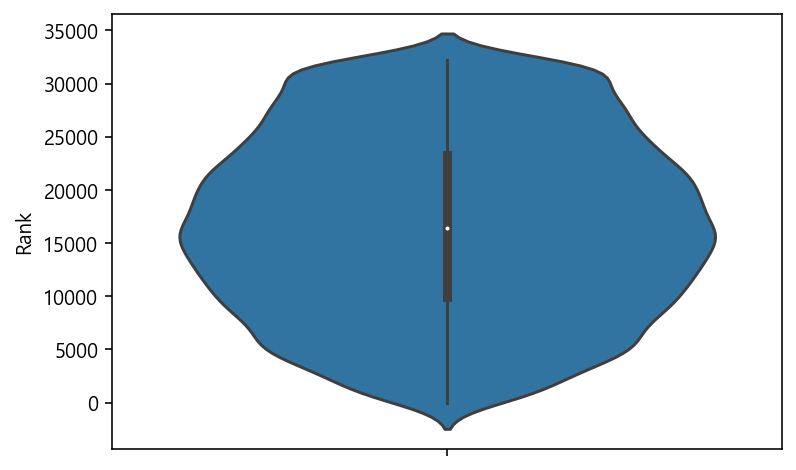

In [23]:
sns.violinplot(data=df, y='Rank')

In [24]:
df_under25 = df[df['Rank'] < 9983] # ‚ë†

In [25]:
diet_keyword1='Îã§Ïù¥Ïñ¥Ìä∏'
diet_keyword2='Îã§Ïöî'
diet_keyword3='Îã§Ïöß'

df_under25_diet = df_under25[(df_under25['title'].str.contains(diet_keyword1)) |\
                             (df_under25['title'].str.contains(diet_keyword2)) |\
                             (df_under25['title'].str.contains(diet_keyword3))]

df_under25_diet.sort_values(by='Rank')[:10] # ‚ë¢



title  replys    views         date  year  \
1684                 Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.  2021   
1783                        ÌèâÏÉù Îã§Ïù¥Ïñ¥Ìä∏~~„Öú„Öú     197  14000.0  2021.09.30.  2021   
881                  Í≥§ÏïΩ Îã§Ïù¥Ïñ¥Ìä∏Îäî Ï†ïÎßêÎ°ú ÏúÑÌóòÌï©ÎãàÎã§     118  18000.0  2022.01.06.  2022   
2549        Îã§ÏößÏùÑ ÏÑ±Í≥µÌïòÍ≥†Î≥¥Îãà Îã§ÏößÏùÄ ÏÜåÏãùÌïòÎäîÍ≤å ÏïÑÎãàÎçîÎùºÍ≥†Ïöî     126  12000.0  2021.07.19.  2021   
11251                    Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÏù∏Í±∞Ï£†??^^     112  12000.0  2019.07.13.  2019   
5896          Îã§Ïù¥Ïñ¥Ìä∏ÌïúÏùòÏõê(Í∞ïÎÇ®ÌÉëorÏÑ†Ïù¥Í≥†ÏùÄ)Ï∂îÏ≤úÏ≤úÌï¥Ï£ºÏÑ∏Ïöî      78  13000.0  2020.08.25.  2020   
778    Îã§Ïù¥Ïñ¥Ìä∏ Ìï†Î†§Î©¥ Ïù¥Í≤ÉÎßåÌÅºÏùÄ Î¨¥Ï°∞Í±¥ ÎÅäÏñ¥ÏïºÌïúÎã§ ÎßêÌï¥Ï£ºÏÑ∏Ïöî„Öú„Öú     132   8809.0  2022.01.16.  2022   
16631       (ÏùºÏÉÅ) Í∞ÑÏ†àÌïú ÏßàÎ¨∏ : Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî?     156   8162.0  2022.03.22.  2022   
137         (ÏùºÏÉÅ) Í∞ÑÏ†àÌïú ÏßàÎ¨∏ : Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî?     156   8161.0  2022.03.22.  2022   
2209                    Îã§Ïù¥Ïñ¥Ìä∏ ÏÑ±Í≥µÏù¥ÌõÑÏóê Í∞ïÎ∞ï..      92   9364.0  2021.08.22.  2021   

       month  day Date_Created  reply_rank  view_rank   Rank  
1684      10   13          ÏàòÏöîÏùº        30.0       20.0   50.0  
1783       9   30          Î™©ÏöîÏùº        17.0       41.0   58.0  
881        1    6          Î™©ÏöîÏùº        45.0       15.0   60.0  
2549       7   19          ÏõîÏöîÏùº        41.0       60.0  101.0  
11251      7   13          ÌÜ†ÏöîÏùº        50.5       60.0  110.5  
5896       8   25          ÌôîÏöîÏùº        94.0       50.5  144.5  
778        1   16          ÏùºÏöîÏùº        39.0      111.0  150.0  
16631      3   22          ÌôîÏöîÏùº        26.0      126.0  152.0  
137        3   22          ÌôîÏöîÏùº        26.0      127.5  153.5  
2209       8   22          ÏùºÏöîÏùº        71.0       95.0  166.0

ÌòïÌÉúÏÜå Î∂ÑÏÑù - Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [26]:
okt = Okt()
komoran = Komoran()
twitter = Twitter()

sample_text = "ÏòÅÏñëÏ†ú Î®πÏúºÎ©¥ÏÑú Í±∑Í∏∞Ïö¥ÎèôÌïòÎãà ÏÇ¥Ïù¥ Îπ†Ï†∏Ïöî"

In [27]:
pprint(okt.pos(sample_text))

[('ÏòÅ', 'Modifier'),
 ('ÏñëÏ†ú', 'Noun'),
 ('Î®πÏúºÎ©¥ÏÑú', 'Verb'),
 ('Í±∑Í∏∞', 'Noun'),
 ('Ïö¥Îèô', 'Noun'),
 ('ÌïòÎãà', 'Noun'),
 ('ÏÇ¥Ïù¥', 'Noun'),
 ('Îπ†Ï†∏Ïöî', 'Verb')]


In [28]:
pprint(komoran.pos(sample_text))

[('ÏòÅÏñëÏ†ú', 'NNG'),
 ('Î®π', 'VV'),
 ('ÏúºÎ©¥ÏÑú', 'EC'),
 ('Í±∑Í∏∞', 'NNP'),
 ('Ïö¥Îèô', 'NNG'),
 ('Ìïò', 'XSV'),
 ('Îãà', 'EC'),
 ('ÏÇ¥', 'NNB'),
 ('Ïù¥', 'JKS'),
 ('Îπ†ÏßÄ', 'VV'),
 ('Ïñ¥Ïöî', 'EC')]


In [29]:
pprint(twitter.pos(sample_text))

[('ÏòÅ', 'Modifier'),
 ('ÏñëÏ†ú', 'Noun'),
 ('Î®πÏúºÎ©¥ÏÑú', 'Verb'),
 ('Í±∑Í∏∞', 'Noun'),
 ('Ïö¥Îèô', 'Noun'),
 ('ÌïòÎãà', 'Noun'),
 ('ÏÇ¥Ïù¥', 'Noun'),
 ('Îπ†Ï†∏Ïöî', 'Verb')]


In [30]:
komoran.nouns(sample_text)

['ÏòÅÏñëÏ†ú', 'Í±∑Í∏∞', 'Ïö¥Îèô', 'ÏÇ¥']

In [31]:
def get_kor_only(text):
    """ÌïúÍ∏Ä, ÏòÅÏñ¥, Ïà´ÏûêÎßå Ï∂îÏ∂úÌïúÎã§"""
    tmp = re.compile('[Í∞Ä-Ìû£a-zA-Z0-9]+').findall(str(text)) #‚ë†
    result = ' '.join(tmp)                                   #‚ë°

    return result

text = "Îã§Ïù¥Ïñ¥Ìä∏ ÎèÑÏôÄÏ£ºÏÑ∏Ïöîüôè Diet, 9kg Í∞êÎüâ Î™©Ìëú „Ö†"
result = get_kor_only(text)

print(result) 

Îã§Ïù¥Ïñ¥Ìä∏ ÎèÑÏôÄÏ£ºÏÑ∏Ïöî Diet 9kg Í∞êÎüâ Î™©Ìëú


In [32]:
df_under25_diet['re_title'] = df_under25_diet['title'].apply(lambda x:get_kor_only(x))
df_under25_diet.sample(3)

title  replys   views         date  year  month  \
125              ÏàòÏòÅ Îã§Ïù¥Ïñ¥Ìä∏Ïóê ÎèÑÏõÄ ÎêòÎÇòÏöî??      24   278.0  2022.03.23.  2022      3   
3008             Îã§Ïù¥Ïñ¥Ìä∏ ÎπÑÎ≤ï Í≥µÏú†Ìï¥Ï£ºÏÑ∏Ïöî!„Ö†„Ö†      15   337.0  2021.06.03.  2021      6   
16631  (ÏùºÏÉÅ) Í∞ÑÏ†àÌïú ÏßàÎ¨∏ : Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî?     156  8162.0  2022.03.22.  2022      3   

       day Date_Created  reply_rank  view_rank    Rank                re_title  
125     23          ÏàòÏöîÏùº       704.5     8340.0  9044.5         ÏàòÏòÅ Îã§Ïù¥Ïñ¥Ìä∏Ïóê ÎèÑÏõÄ ÎêòÎÇòÏöî  
3008     3          Î™©ÏöîÏùº      1891.5     6867.5  8759.0          Îã§Ïù¥Ïñ¥Ìä∏ ÎπÑÎ≤ï Í≥µÏú†Ìï¥Ï£ºÏÑ∏Ïöî  
16631   22          ÌôîÏöîÏùº        26.0      126.0   152.0  ÏùºÏÉÅ Í∞ÑÏ†àÌïú ÏßàÎ¨∏ Îã§Ïù¥Ïñ¥Ìä∏ Ïñ¥ÎñªÍ≤å ÌïòÏÑ∏Ïöî

In [33]:
diet_onesent = " ".join(df_under25_diet['re_title'].tolist()) # ‚ë†

nouns_diet = []
for noun in komoran.nouns(diet_onesent): # ‚ë°
    if len(noun)>1:
        nouns_diet.append(noun)
    else:
        continue

In [34]:
nouns_diet=[noun for noun in komoran.nouns(diet_onesent) if len(noun)>1]

In [35]:
nouns_diet

['Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎïÖÏΩ© Î≤ÑÌÑ∞',
 'ÌõÑÍ∏∞',
 'Îã®Í∏∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïúÏïΩ',
 'ÏöîÌä∏',
 'ÏïÑÏπ®',
 'ÏãùÎã®',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ìà¨Ïûê',
 'ÎπÑÏö©',
 'ÏàòÏòÅ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎèÑÏõÄ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏùºÏÉÅ',
 'ÏßàÎ¨∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÑ±Í≥µ',
 'ÌÇ§Î°ú',
 'ÌïÑÎùºÌÖåÏä§',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ìö®Í≥º',
 'Ï≤¥Ï§ë',
 'Ï†ïÏ≤¥',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Î∞©Î≤ï',
 'Í≥µÏú†',
 'Î∂ÄÌÉÅ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏßàÎ¨∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÑ±Í≥µÏùò ÎπÑÎ∞Ä',
 'Í∞ëÏÉÅÏÑ†',
 'Í∏∞Îä•',
 'Ï†ÄÌïò',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÎèÑÏ†Ñ',
 'ÌïúÏïΩ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ïã†Î∂Ñ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Í∞ÑÏãù',
 'Í≥ºÏùº',
 'ÌîÑÎ°ú',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Î≥¥Ï°∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïÑÎùºÌÖåÏä§',
 'Ìó¨Ïä§',
 'ÌïÑÏöî',
 'ÌïúÍ≥≥',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ï†êÌïë',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïúÏïΩ',
 'Î∂ÄÏûëÏö©',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'Ï†úÏùº',
 'Ïö¥Îèô',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏòÜÍµ¨Î¶¨',
 'ÏÇ¨ÏßÑ',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÉùÎ¶¨',
 'ÏßÄÏó∞',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÌïòÏãúÎÇò',
 'Îã§Ï

In [36]:
Counter(nouns_diet).most_common()

[('Îã§Ïù¥Ïñ¥Ìä∏', 580),
 ('ÌïúÏïΩ', 68),
 ('Ìö®Í≥º', 41),
 ('ÏãùÎã®', 34),
 ('Ï∂îÏ≤ú', 28),
 ('ÏãúÏûë', 26),
 ('ÏÑ±Í≥µ', 25),
 ('Î∞©Î≤ï', 20),
 ('Ïö¥Îèô', 19),
 ('ÌÇ§Î°ú', 18),
 ('Ïã†Î∂Ñ', 16),
 ('ÏïΩÏÇ¨', 16),
 ('ÏïÑÏ§åÎßà', 15),
 ('Î≥¥Ï°∞', 14),
 ('ÏùºÏ∞®', 13),
 ('Í∞ÄÏöî', 13),
 ('ÌõÑÍ∏∞', 12),
 ('Í∞êÎüâ', 12),
 ('ÏùòÏõê', 12),
 ('Ïò§Îäò', 10),
 ('Î∂ÄÌÉÅ', 9),
 ('ÎÖ∏ÌïòÏö∞', 9),
 ('Í≥µÏú†', 8),
 ('Í∞úÏõî', 8),
 ('Ïú†ÏßÄ', 8),
 ('ÎèÑÏõÄ', 7),
 ('Îã®Í∏∞Í∞Ñ', 7),
 ('ÏßàÎ¨∏', 6),
 ('ÌïòÏãúÎÇò', 6),
 ('ÌèâÏÉù', 6),
 ('ÌïúÎ∞©', 6),
 ('ÏöîÌä∏', 5),
 ('ÌïÑÎùºÌÖåÏä§', 5),
 ('Ï†ïÏ≤¥', 5),
 ('Î∂ÄÏûëÏö©', 5),
 ('ÏöîÏ¶ò', 5),
 ('Í∞ÑÌóê', 5),
 ('Ï£ºÏ∞®', 5),
 ('Í≥†ÎØº', 5),
 ('ÏöîÏöî', 5),
 ('Îã®Í∏∞', 4),
 ('Ï≤¥Ï§ë', 4),
 ('Ï†êÌïë', 4),
 ('Ï†úÏùº', 4),
 ('ÎîîÌÜ°Ïä§', 4),
 ('ÏãùÏöï', 4),
 ('ÏÇ∞ÌõÑ', 4),
 ('Î™∏Î¨¥Í≤å', 4),
 ('Îã®Ïãù', 4),
 ('Ï°∞Ïñ∏', 4),
 ('Ï†ÄÎÖÅ', 4),
 ('ÏïÑÏπ®', 3),
 ('Í∞ÑÏãù', 3),
 ('Í±∑Í∏∞', 3),
 ('ÏãúÍ∞Ñ', 3),
 ('ÌÇ¨Î°ú', 3),
 ('Í±¥Í∞ï', 3),
 ('Î≥ëÏõê', 3),
 ('Ïù¥ÌõÑ', 3),
 (

In [37]:
pt_keyword1='Ïö¥Îèô'
pt_keyword2='ÌïÑÎùº'
pt_keyword3='Ìó¨Ïä§'
pt_keyword4='ÏöîÍ∞Ä'
pt_keyword5='ÌîºÌã∞'
pt_keyword6='PT'

df_under25_pt = df_under25[(df_under25['title'].str.contains(pt_keyword1)) |\
          (df_under25['title'].str.contains(pt_keyword2)) |\
          (df_under25['title'].str.contains(pt_keyword3)) |\
          (df_under25['title'].str.contains(pt_keyword4)) |\
          (df_under25['title'].str.contains(pt_keyword5)) |\
          (df_under25['title'].str.contains(pt_keyword6))]

df_under25_pt.sort_values(by='Rank')[:10]

title  replys    views         date  \
1684                        Ïù¥ ÎßõÏóê Ïö¥ÎèôÌïòÍ≥† Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏ£†‚ô°     148  17000.0  2021.10.13.   
1904                           ÌîºÌã∞Î∞õÏùÑÎïå Ìä∏Î†àÏù¥ÎÑàÎì§Ïù¥ ÏõêÎûò      71  14000.0  2021.09.18.   
3545                    ÌïÑÎùºÌÖåÏä§. ÌîºÌã∞ Î†àÍπÖÏä§ ÏûÖÏùÑÎïå Ìå¨Ìã∞ „Ö†„Ö†      56   9804.0  2021.04.13.   
918                         Í±∑Í∏∞Ïö¥Îèô 1ÏãúÍ∞ÑÏî© Îã§Ïù¥Ïñ¥Ìä∏ÎêòÎÇòÏöî?      68   8116.0  2022.01.03.   
10611                                ÌïÑÎùºÌÖåÏä§ Í∞ïÏÇ¨Ï†ÑÎßù      28   4768.0  2019.08.26.   
6323                         ÌïúÎã¨ÎèôÏïà Ïö¥Îèô ÏóÜÏù¥ ÏÇ¥ ÎπºÎ†§Î©¥Ïöî      29   1702.0  2020.07.17.   
10204  ÏÇ¥ ÎπºÎ†§Í≥† Îß§Ïùº Í±∑Í∏∞Ïö¥ÎèôÌïòÍ≥† ÏûàÏñ¥Ïöî~ Ïã§Ìå®ÏóÜÏù¥ ÏÑ±Í≥µÌïòÎäî ÎÖ∏ÌïòÏö∞ Î≠òÍπåÏöî?      32   1492.0  2019.09.27.   
8521            Ïù¥Îü∞ Îí∑ÌÉúÍ∞Ä Ï¢ãÏïÑÏßÄÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ïñ¥Îñ§ Ïö¥ÎèôÏùÑÌï¥ÏïºÌï†ÍπåÏöî?„Ö†      24   1729.0  2020.02.01.   
7717                    Îã§Ïù¥Ïñ¥Ìä∏ Ï°∞Ïñ∏Ìï¥Ï£ºÏÑ∏Ïöî!Ïö¥ÎèôÌï¥ÎèÑ ÏïàÎπ†Ïßê..      59   1091.0  2020.03.31.   
4302                      Ìó¨Ïä§Ïû• PT Í∞ÄÍ≤©.. ÏõêÎûò Ïù¥Îü∞Í±¥Í∞ÄÏöî      17  12000.0  2021.02.03.   

       year  month  day Date_Created  reply_rank  view_rank    Rank  
1684   2021     10   13          ÏàòÏöîÏùº        30.0       20.0    50.0  
1904   2021      9   18          ÌÜ†ÏöîÏùº       100.5       41.0   141.5  
3545   2021      4   13          ÌôîÏöîÏùº       146.5       86.0   232.5  
918    2022      1    3          ÏõîÏöîÏùº       109.5      129.0   238.5  
10611  2019      8   26          ÏõîÏöîÏùº       491.5      243.0   734.5  
6323   2020      7   17          Í∏àÏöîÏùº       457.5      678.0  1135.5  
10204  2019      9   27          Í∏àÏöîÏùº       379.0      801.0  1180.0  
8521   2020      2    1          ÌÜ†ÏöîÏùº       704.5      660.0  1364.5  
7717   2020      3   31          ÌôîÏöîÏùº       137.5     1271.5  1409.0  
4302   2021      2    3          ÏàòÏöîÏùº      1458.5       60.0  1518.5

In [38]:
df_under25_pt['re_title'] = df_under25_pt['title'].apply(lambda x:get_kor_only(x))

In [39]:
pt_onesent = " ".join(df_under25_pt['re_title'].tolist())
nouns_pt = [noun for noun in komoran.nouns(pt_onesent) if len(noun) > 1]

In [40]:
Counter(nouns_pt).most_common()[:10]

[('Ïö¥Îèô', 106),
 ('ÌïÑÎùºÌÖåÏä§', 47),
 ('Îã§Ïù¥Ïñ¥Ìä∏', 23),
 ('Ìö®Í≥º', 18),
 ('Ìó¨Ïä§', 15),
 ('ÏöîÍ∞Ä', 14),
 ('Í∏∞Íµ¨', 10),
 ('Ï†ïÎèÑ', 8),
 ('Í±∑Í∏∞', 7),
 ('Í∑ºÎ†•', 7)]

In [41]:
keyword1='Ïö¥Îèô'
keyword2='ÌïÑÎùº'
keyword3='Îã§Ïù¥Ïñ¥Ìä∏'
keyword4='Ìó¨Ïä§'
keyword5='ÏöîÍ∞Ä'

df_under25_others = df_under25[~(df_under25['title'].str.contains(keyword1)) &\
                               ~(df_under25['title'].str.contains(keyword2)) &\
                               ~(df_under25['title'].str.contains(keyword3)) &\
                               ~(df_under25['title'].str.contains(keyword4)) &\
                               ~(df_under25['title'].str.contains(keyword5))]

In [42]:
df_under25_others['re_title'] = df_under25_others['title'].apply(lambda x:get_kor_only(x))

other_onesent = " ".join(df_under25_others['re_title'].tolist())
nouns_other = [noun for noun in komoran.nouns(other_onesent) if len(noun) > 1]

Counter(nouns_other).most_common()[:60]

[('Ï∂îÏ≤ú', 202),
 ('Ìö®Í≥º', 129),
 ('ÌîºÎ∂Ä', 120),
 ('Í¥ÄÎ¶¨', 114),
 ('ÏàòÏà†', 102),
 ('Í∞ÄÏöî', 91),
 ('Ïã†Î∂Ñ', 75),
 ('ÌÅ¨Î¶º', 75),
 ('ÏßÄÎ∞©', 69),
 ('ÏñºÍµ¥', 67),
 ('Ï£ºÏÇ¨', 62),
 ('ÌÇ§Î°ú', 61),
 ('Ï£ºÎ¶Ñ', 50),
 ('Ïó¨ÎìúÎ¶Ñ', 50),
 ('Î∞©Î≤ï', 50),
 ('Í∏∞ÎØ∏', 49),
 ('ÏπòÎ£å', 47),
 ('Î∂ÄÌÉÅ', 46),
 ('Í≥†ÎØº', 43),
 ('ÎßàÏä§ÌÅ¨', 43),
 ('Ïú†ÏÇ∞', 43),
 ('Í∞ÄÏä¥', 42),
 ('ÌõÑÍ∏∞', 40),
 ('ÏãúÏà†', 40),
 ('Î†àÏù¥Ï†Ä', 39),
 ('ÎààÎ∞ë', 39),
 ('Î®∏Î¶¨', 39),
 ('Ï†úÍ±∞', 39),
 ('ÏÇ¨ÏßÑ', 38),
 ('ÌïÑÎü¨', 37),
 ('Î≥¥ÌÜ°Ïä§', 37),
 ('ÏßàÎ¨∏', 34),
 ('ÎïåÎ¨∏', 33),
 ('Î≥ëÏõê', 33),
 ('ÌîºÎ∂ÄÍ≥º', 32),
 ('ÌÉàÎ™®', 29),
 ('ÏòÅÏñëÏ†ú', 29),
 ('ÏÉ¥Ìë∏', 29),
 ('Î±ÉÏÇ¥', 27),
 ('ÌôîÏû•Ìíà', 27),
 ('Ïû¨Î∞∞', 26),
 ('ÏãùÏöï', 26),
 ('ÎààÏçπ', 26),
 ('Ìó§Ïñ¥', 26),
 ('ÏåçÏàò', 25),
 ('Í∞úÏõî', 25),
 ('30ÎåÄ', 25),
 ('ÎÇ®Ìé∏', 24),
 ('Î∂ÄÏûëÏö©', 24),
 ('ÎÖ∏ÌïòÏö∞', 24),
 ('ÏöîÏ¶ò', 24),
 ('Í∞êÎüâ', 24),
 ('ÏΩúÎùºÍ≤ê', 23),
 ('ÌïòÏãúÎÇò', 23),
 ('Îã®Ïãù', 23),
 ('ÏÇ¨Ïö©', 23),
 ('ÌåîÏûê',

In [43]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('Ïñ¥ÎñªÍ≤å', 95),
 ('Ï∂îÏ≤úÌï¥Ï£ºÏÑ∏Ïöî', 87),
 ('Î∂Ñ', 84),
 ('ÏûàÎÇòÏöî', 66),
 ('Ìö®Í≥º', 62),
 ('Ï¢Ä', 54),
 ('Í≥ÑÏã†Í∞ÄÏöî', 49),
 ('ÎÑàÎ¨¥', 47),
 ('ÏûàÏùÑÍπåÏöî', 46),
 ('Ï∂îÏ≤ú', 44),
 ('ÏßÑÏßú', 43),
 ('ÌîºÎ∂Ä', 41),
 ('ÌòπÏãú', 40),
 ('Ìï¥Î≥¥Ïã†Î∂Ñ', 37),
 ('ÏàòÏà†', 36),
 ('ÏñºÍµ¥', 35),
 ('Í¥ÄÎ¶¨', 35),
 ('Ïûò', 33),
 ('ÎßéÏù¥', 33),
 ('ÏïåÎ†§Ï£ºÏÑ∏Ïöî', 33),
 ('Î∂ÑÎì§', 33),
 ('ÌõÑ', 32),
 ('Ï¢ãÏùÄ', 32),
 ('ÌïòÏÑ∏Ïöî', 30),
 ('Î¥êÏ£ºÏÑ∏Ïöî', 29),
 ('Îçî', 29),
 ('Î≠êÍ∞Ä', 29),
 ('Îã§Îì§', 28),
 ('Î∞©Î≤ï', 27),
 ('Î≥¥ÌÜ°Ïä§', 27),
 ('Ïú†ÏÇ∞Í∑†', 27),
 ('Ï†Ä', 26),
 ('Î†àÏù¥Ï†Ä', 25),
 ('ÌîºÎ∂ÄÍ¥ÄÎ¶¨', 25),
 ('ÏÇ¥', 25),
 ('Ïñ¥Îñ§Í∞ÄÏöî', 25),
 ('ÏïÑÏãúÎäîÎ∂Ñ', 24),
 ('ÌõÑÍ∏∞', 23),
 ('ÏÇ¥Ïù¥', 23),
 ('Î¶¨ÌîÑÌåÖ', 23),
 ('ÏöîÏ¶ò', 23),
 ('Í∞ôÏïÑÏöî', 23),
 ('Ïñ¥Îñ§Í±∞', 23),
 ('Î∞õÍ≥†', 22),
 ('Í∏∞ÎØ∏', 22),
 ('ÏãúÏà†', 22),
 ('Ìï¥Ï£ºÏÑ∏Ïöî', 22),
 ('Ïó¨ÎìúÎ¶Ñ', 22),
 ('ÎààÎ∞ëÏßÄÎ∞©Ïû¨Î∞∞Ïπò', 21),
 ('ÌîºÎ∂ÄÍ≥º', 21),
 ('ÏòÅÏñëÏ†ú', 21),
 ('ÏäàÎßÅÌÅ¨', 21),
 ('ÌïòÏãúÎÇòÏö

### Î™ÖÏÇ¨ Ï∂îÍ∞ÄÌïòÍ∏∞

In [44]:
new_nouns_dict = './data/Ïã†Í∑úÎ™ÖÏÇ¨ÏÇ¨Ï†Ñ.txt'
komoran_add = Komoran(userdic=new_nouns_dict)

In [45]:
sample_nouns_text = 'Ïù¥Î≤àÏóê ÎÇòÏò® ÌôçÏÇºÏ†§Î¶¨Í∞Ä Ï∞∏ ÎßõÏûàÎÑ§Ïöî.'
print("Í∏∞Î≥∏ Î™ÖÏÇ¨ ÏÇ¨Ï†Ñ Ï†ÅÏö© ÌõÑ Î™ÖÏÇ¨ Ï∂îÏ∂ú :", komoran.nouns(sample_nouns_text))
print("Î™ÖÏÇ¨ Ï∂îÍ∞Ä ÌõÑ Î™ÖÏÇ¨ Ï∂îÏ∂ú :",komoran_add.nouns(sample_nouns_text))

Í∏∞Î≥∏ Î™ÖÏÇ¨ ÏÇ¨Ï†Ñ Ï†ÅÏö© ÌõÑ Î™ÖÏÇ¨ Ï∂îÏ∂ú : ['Ïù¥Î≤à', 'ÌôçÏÇº', 'Ï†§Î¶¨']
Î™ÖÏÇ¨ Ï∂îÍ∞Ä ÌõÑ Î™ÖÏÇ¨ Ï∂îÏ∂ú : ['Ïù¥Î≤à', 'ÌôçÏÇºÏ†§Î¶¨']


In [46]:
other_onesent = " ".join(df_under25_others['re_title'].tolist())
Counter(other_onesent.split()).most_common()[:60]

[('Ïñ¥ÎñªÍ≤å', 95),
 ('Ï∂îÏ≤úÌï¥Ï£ºÏÑ∏Ïöî', 87),
 ('Î∂Ñ', 84),
 ('ÏûàÎÇòÏöî', 66),
 ('Ìö®Í≥º', 62),
 ('Ï¢Ä', 54),
 ('Í≥ÑÏã†Í∞ÄÏöî', 49),
 ('ÎÑàÎ¨¥', 47),
 ('ÏûàÏùÑÍπåÏöî', 46),
 ('Ï∂îÏ≤ú', 44),
 ('ÏßÑÏßú', 43),
 ('ÌîºÎ∂Ä', 41),
 ('ÌòπÏãú', 40),
 ('Ìï¥Î≥¥Ïã†Î∂Ñ', 37),
 ('ÏàòÏà†', 36),
 ('ÏñºÍµ¥', 35),
 ('Í¥ÄÎ¶¨', 35),
 ('Ïûò', 33),
 ('ÎßéÏù¥', 33),
 ('ÏïåÎ†§Ï£ºÏÑ∏Ïöî', 33),
 ('Î∂ÑÎì§', 33),
 ('ÌõÑ', 32),
 ('Ï¢ãÏùÄ', 32),
 ('ÌïòÏÑ∏Ïöî', 30),
 ('Î¥êÏ£ºÏÑ∏Ïöî', 29),
 ('Îçî', 29),
 ('Î≠êÍ∞Ä', 29),
 ('Îã§Îì§', 28),
 ('Î∞©Î≤ï', 27),
 ('Î≥¥ÌÜ°Ïä§', 27),
 ('Ïú†ÏÇ∞Í∑†', 27),
 ('Ï†Ä', 26),
 ('Î†àÏù¥Ï†Ä', 25),
 ('ÌîºÎ∂ÄÍ¥ÄÎ¶¨', 25),
 ('ÏÇ¥', 25),
 ('Ïñ¥Îñ§Í∞ÄÏöî', 25),
 ('ÏïÑÏãúÎäîÎ∂Ñ', 24),
 ('ÌõÑÍ∏∞', 23),
 ('ÏÇ¥Ïù¥', 23),
 ('Î¶¨ÌîÑÌåÖ', 23),
 ('ÏöîÏ¶ò', 23),
 ('Í∞ôÏïÑÏöî', 23),
 ('Ïñ¥Îñ§Í±∞', 23),
 ('Î∞õÍ≥†', 22),
 ('Í∏∞ÎØ∏', 22),
 ('ÏãúÏà†', 22),
 ('Ìï¥Ï£ºÏÑ∏Ïöî', 22),
 ('Ïó¨ÎìúÎ¶Ñ', 22),
 ('ÎààÎ∞ëÏßÄÎ∞©Ïû¨Î∞∞Ïπò', 21),
 ('ÌîºÎ∂ÄÍ≥º', 21),
 ('ÏòÅÏñëÏ†ú', 21),
 ('ÏäàÎßÅÌÅ¨', 21),
 ('ÌïòÏãúÎÇòÏö

### Ìä∏ÏúóÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [47]:
df_tweet = pd.read_excel('./data/Îã§Ïù¥Ïñ¥Ìä∏_Ìä∏Ïúó.xlsx')

In [48]:
df_tweet.sample(3)

Created At Hashtags  \
192  Sat Jun 04 04:42:53 +0000 2022       []   
209  Sat Jun 04 04:37:20 +0000 2022       []   
587  Sat Jun 04 02:42:23 +0000 2022       []   

                                                Tweets  
192  ÏÉùÍ∞ÅÌï¥Î≥¥Î©¥ Ìï†Í≤å Ï°¥ÎÇò ÏûîÎú©ÏûàÎÑ§ Îã§Ïù¥Ïñ¥Ìä∏ÎèÑÌï¥ÏïºÌï® ÏûÑÌîåÎûÄÌä∏ÎèÑÌï¥ÏïºÌï® ÌîºÎ∂ÄÍ≥ºÏπòÎ£åÎèÑÎ∞õÏïÑÏïºÌï® ...  
209                     ÏãúÏûò „Ö°„Ö°Î∞ú „ÖåÎã§Ïù¥Ïñ¥Ìä∏Ìï¥ÏïºÏûê„Öú„Öú„Öú„Öú„Öú„Öú„ÖáÏßÑÏßúÎπ°Ï≥êÍ∞úÏßúÏ¶ùÎÇ®  
587  RT @euncho__: Ïö¥ÎèôÏóê ÎØ∏Ï≥êÍ∞ÄÎäî Í≥ºÏ†ï\n\nÏûÖÎ¨∏-ÏßÑÏßú ÏÜîÏßÅÌûà ÎÑàÎ¨¥ Í∞ÄÍ∏∞ Ïã´...

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - ÎßûÏ∂§Î≤ï ÍµêÏ†ï

In [49]:
from hanspell import spell_checker

In [50]:
text = "Ìï¥Î¥§Ïûê ÏïàÎèºÎäî Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏßÄÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇòÎ®πÏûê"

In [51]:
print(spell_checker.check(text))

Checked(result=True, original='Ìï¥Î¥§Ïûê ÏïàÎèºÎäî Îã§Ïù¥Ïñ¥Ìä∏ ÌïòÏßÄÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇòÎ®πÏûê', checked='Ìï¥Î¥§Ïûê ÏïàÎêòÎäî Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ ÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇò Î®πÏûê', errors=3, words=OrderedDict([('Ìï¥Î¥§Ïûê', 0), ('ÏïàÎêòÎäî', 1), ('Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ', 2), ('ÎßêÍ≥†', 2), ('Ï†ÄÎÖÅÏù¥ÎÇò', 2), ('Î®πÏûê', 2)]), time=0.3349940776824951)


In [52]:
print(spell_checker.check(text).checked)

Ìï¥Î¥§Ïûê ÏïàÎêòÎäî Îã§Ïù¥Ïñ¥Ìä∏ÌïòÏßÄ ÎßêÍ≥† Ï†ÄÎÖÅÏù¥ÎÇò Î®πÏûê


In [53]:
def get_kor_text(text):
    """ÌïúÍ∏ÄÎßå Ï∂îÏ∂úÌïúÎã§"""
    tmp = re.compile('[Í∞Ä-Ìû£]+').findall(str(text))
    result = ' '.join(tmp)
    
    return result

In [54]:
df_tweet['re_Tweet'] = df_tweet['Tweets'].apply(lambda x:get_kor_text(x))

In [55]:
df_tweet.sample(3)

Created At  \
271  Sat Jun 04 04:22:55 +0000 2022   
256  Sat Jun 04 04:26:23 +0000 2022   
593  Sat Jun 04 02:40:38 +0000 2022   

                                              Hashtags  \
271                                                 []   
256                                                 []   
593  [{'text': 'YetToCome', 'indices': [96, 106]}, ...   

                                                Tweets  \
271  Ïù¥Î†áÍ≤åÎßå Îì§ÏúºÎ©¥ Ï†ïÎßê Ï¢ãÏùÑ Í≤É Í∞ôÏùÄÎç∞ Í∑∏ÎèôÏïà ÏóÑÏ≤≠ÎÇòÍ≤å ÏòàÏÅú Ïó¨Ïûê, Ìä∏Î°úÌîº ÏôÄÏù¥ÌîÑ Ï†Ñ...   
256                   1K3J\n\nÍ±¥ÎåÄÏ∂úÏû•ÏÉµ Í±¥ÎåÄÏ∂úÏû•ÏÉµ Îã§Ïù¥Ïñ¥Ìä∏ÏùºÍ∏∞ Ïù∏Ï†úÍµ∞ÏïàÎßà   
593  RT @Jj33112634: Îã§Ïù¥Ïñ¥Ìä∏ ÎπÑÎπîÍµ≠Ïàò?„Öã\nÎ•ºÍ∞ÄÏû•Ìïú..üòö\nThe worl...   

                                              re_Tweet  
271  Ïù¥Î†áÍ≤åÎßå Îì§ÏúºÎ©¥ Ï†ïÎßê Ï¢ãÏùÑ Í≤É Í∞ôÏùÄÎç∞ Í∑∏ÎèôÏïà ÏóÑÏ≤≠ÎÇòÍ≤å ÏòàÏÅú Ïó¨Ïûê Ìä∏Î°úÌîº ÏôÄÏù¥ÌîÑ Ï†ÑÌòï...  
256                           Í±¥ÎåÄÏ∂úÏû•ÏÉµ Í±¥ÎåÄÏ∂úÏû•ÏÉµ Îã§Ïù¥Ïñ¥Ìä∏ÏùºÍ∏∞ Ïù∏Ï†úÍµ∞ÏïàÎßà  
593                                     Îã§Ïù¥Ïñ¥Ìä∏ ÎπÑÎπîÍµ≠Ïàò Î•ºÍ∞ÄÏû•Ìïú

In [56]:
def checkGrammer(text):
    """Î¨∏Î≤ïÍµêÏ†ïÌïúÎã§"""    
    
    txt = spell_checker.check(text)
    result = txt.checked
    
    return result

In [57]:
df_tweet['check_Tweet']=df_tweet['re_Tweet'].apply(lambda x:checkGrammer(x))

In [58]:
df_tweet.sample(3)

Created At Hashtags  \
356  Sat Jun 04 03:59:21 +0000 2022       []   
979  Sat Jun 04 00:50:59 +0000 2022       []   
482  Sat Jun 04 03:18:29 +0000 2022       []   

                                                Tweets  \
356  Íµ¨Í∏ÄÌï¥Î¥§ÎäîÎç∞ ÌóåÌòàÌïòÎ©¥ÏÑú Îì±Î°ùÌïòÎäîÍ≤å Í∏∞Î≥∏Ï†àÏ∞®Ïù∏Í∞ÄÎ¥ê ÏùºÎã® Îã§Ïù¥Ïñ¥Ìä∏ÌïòÎäî Í∏∞Í∞ÑÎèôÏïàÏóêÎäî Ìè¨Í∏∞...   
979  4Ïõî, Îã§Ïù¥Ïñ¥Ìä∏Î•º Ï≤òÏùå ÏãúÏûëÌïòÎçò Îïå\nÎÇ†Ïî®Í∞Ä Í∑∏Î¶¨ Îç•ÏßÄ ÏïäÏïòÏßÄÎßå ÌöåÏÇ¨ÍπåÏßÄ Í±∏Ïñ¥Ïò§Î©¥ ...   
482  „Öã„ÖãÍ∑∏ÏπòÎßå ÎØ∏Î°úÏùò Ï†ÑÏÇ¨ÏóêÏÑú Ïñ¥Îùº? ÎÑà Î≠ò.. Î®πÍ≥† ÏßÄÎÇ∏ Í±∞Ïïº? Í∞ôÏùÄ Í∏∞Î∂ÑÎêòÏÑú „Öã„Öã ...   

                                              re_Tweet  \
356  Íµ¨Í∏ÄÌï¥Î¥§ÎäîÎç∞ ÌóåÌòàÌïòÎ©¥ÏÑú Îì±Î°ùÌïòÎäîÍ≤å Í∏∞Î≥∏Ï†àÏ∞®Ïù∏Í∞ÄÎ¥ê ÏùºÎã® Îã§Ïù¥Ïñ¥Ìä∏ÌïòÎäî Í∏∞Í∞ÑÎèôÏïàÏóêÎäî Ìè¨Í∏∞...   
979  Ïõî Îã§Ïù¥Ïñ¥Ìä∏Î•º Ï≤òÏùå ÏãúÏûëÌïòÎçò Îïå ÎÇ†Ïî®Í∞Ä Í∑∏Î¶¨ Îç•ÏßÄ ÏïäÏïòÏßÄÎßå ÌöåÏÇ¨ÍπåÏßÄ Í±∏Ïñ¥Ïò§Î©¥ ÎïÄÏúºÎ°ú...   
482  Í∑∏ÏπòÎßå ÎØ∏Î°úÏùò Ï†ÑÏÇ¨ÏóêÏÑú Ïñ¥Îùº ÎÑà Î≠ò Î®πÍ≥† ÏßÄÎÇ∏ Í±∞Ïïº Í∞ôÏùÄ Í∏∞Î∂ÑÎêòÏÑú Ïñ¥Îîú Ï°∞ÏÇ¨Ìï¥ÎèÑ Îãπ...   

                                           check_Tweet  
356  Íµ¨Í∏Ä Ìï¥Î¥§ÎäîÎç∞ ÌóåÌòàÌïòÎ©¥ÏÑú Îì±Î°ùÌïòÎäî Í≤å Í∏∞Î≥∏ Ï†àÏ∞®Ïù∏Í∞Ä Î¥ê ÏùºÎã® Îã§Ïù¥Ïñ¥Ìä∏ÌïòÎäî Í∏∞Í∞Ñ ÎèôÏïà...  
979  Ïõî Îã§Ïù¥Ïñ¥Ìä∏Î•º Ï≤òÏùå ÏãúÏûëÌïòÎçò Îïå ÎÇ†Ïî®Í∞Ä Í∑∏Î¶¨ Îç•ÏßÄ ÏïäÏïòÏßÄÎßå ÌöåÏÇ¨ÍπåÏßÄ Í±∏Ïñ¥Ïò§Î©¥ ÎïÄÏúºÎ°ú...  
482  Í∑∏Î†áÏßÄÎßå ÎØ∏Î°úÏùò Ï†ÑÏÇ¨ÏóêÏÑú Ïñ¥Îùº ÎÑà Î≠ò Î®πÍ≥† ÏßÄÎÇ∏ Í±∞Ïïº Í∞ôÏùÄ Í∏∞Î∂Ñ ÎèºÏÑú Ïñ¥Îîú Ï°∞ÏÇ¨Ìï¥ÎèÑ...

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [59]:
komoran = Komoran()

df_tweet.drop_duplicates(subset='check_Tweet', inplace=True)
tweet_onesent = " ".join(df_tweet['check_Tweet'].to_list())
nouns_tweets = [noun for noun in komoran.nouns(tweet_onesent) if len(noun) > 1]

In [60]:
nouns_tweets[:3]

['ÏóÑÎßà', 'Îã§Ïù¥Ïñ¥Ìä∏', 'ÏûîÏÜåÎ¶¨']

### Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù - nGram

In [61]:
def getGram(tokens, n):
    """Î∂ÑÏ†àÎêú Îã®Ïñ¥Î•º Ï†ÑÎã¨ÌïòÎ©¥ nGramÏùÑ Î∞òÌôò"""
    bigrams =[]
    for i in range(0, int(len(tokens)/n)):
        bigrams.append(tokens[i:i+n])
        
    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)
    
    return ngram_result

In [62]:
n2gram_result = getGram(tokens=nouns_tweets, n=2)
n3gram_result = getGram(tokens=nouns_tweets, n=3)

In [63]:
display(n2gram_result.head(15))
display(n3gram_result.head(15))

index  nGram
0   Îã§Ïù¥Ïñ¥Ìä∏ Îã§Ïù¥Ïñ¥Ìä∏     25
1       ÏïåÎ∞î ÏßÅÏõê      9
2       ÏßÅÏõê ÏïåÎ∞î      9
3     Îã§Ïù¥Ïñ¥Ìä∏ ÏãúÏûë      8
4     Îã§Ïù¥Ïñ¥Ìä∏ ÏãùÎã®      7
5     Í∞ïÏ†ú Îã§Ïù¥Ïñ¥Ìä∏      7
6       ÌôúÎèô ÏùºÌôò      6
7       Ïø†Ìå° ÌôúÎèô      6
8     Îã§Ïù¥Ïñ¥Ìä∏ Í∞ÑÏãù      6
9     Îã§Ïù¥Ïñ¥Ìä∏ Í∑∏Îû®      5
10    Îã§Ïù¥Ïñ¥Ìä∏ Ïö¥Îèô      5
11    Îã§Ïù¥Ïñ¥Ìä∏ ÏùåÏãù      5
12    ÏùåÏãù Îã§Ïù¥Ïñ¥Ìä∏      4
13      Ïä§ÌÉÄ Í∑∏Îû®      4
14    Îã§Ïù¥Ïñ¥Ìä∏ Ï†úÏùº      4

index  nGram
0       ÏïåÎ∞î ÏßÅÏõê ÏïåÎ∞î      6
1       Ïø†Ìå° ÌôúÎèô ÏùºÌôò      4
2     ÏùºÏ†ïÏï° ÏàòÏàòÎ£å Ï†úÍ≥µ      3
3     ÏùºÌôò ÏùºÏ†ïÏï° ÏàòÏàòÎ£å      3
4      ÌôúÎèô ÏùºÌôò ÏùºÏ†ïÏï°      3
5     Îã§Ïù¥Ïñ¥Ìä∏ Î±ÉÏÇ¥ Ïö¥Îèô      2
6     ÏùåÏãù Îã§Ïù¥Ïñ¥Ìä∏ ÏùåÏãù      2
7       Î±ÉÏÇ¥ Ïö¥Îèô Î±ÉÏÇ¥      2
8       Ïö¥Îèô Î±ÉÏÇ¥ Ï†úÍ±∞      2
9     Îã§Ïù¥Ïñ¥Ìä∏ ÏïåÎ∞î ÏßÅÏõê      2
10      ÏÉÅÌíà ÎßÅÌÅ¨ Ïä§ÌåÖ      2
11  Îã§Ïù¥Ïñ¥Ìä∏ ÏöîÏ¶ò Îã§Ïù¥Ïñ¥Ìä∏      2
12      Ïä§ÌåÖ Ïø†Ìå° ÌôúÎèô      2
13      ÎßÅÌÅ¨ Ïä§ÌåÖ Ïø†Ìå°      2
14      ÌïúÎ≥µ ÎùºÌåå Î™®ÏûÑ      1

### Íµ≠ÎØº Í±¥Í∞ï Î≥¥Ìóò Í≥µÎã®ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÏßÑÎ£å ÎÇ¥Ïó≠ Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ∏∞

In [64]:
df = pd.read_csv('./data/2020ÎÖÑ_ÏßÑÎ£åÏ†ïÎ≥¥_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv')

In [65]:
df.head(2)

ÏÑ±Î≥ÑÏΩîÎìú  Ïó∞Î†πÎåÄÏΩîÎìú  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú Ï£ºÏÉÅÎ≥ëÏΩîÎìú Î∂ÄÏÉÅÎ≥ëÏΩîÎìú  Ï¥ùÏ≤òÎ∞©ÏùºÏàò  Ïã¨Í≤∞Î≥∏Ïù∏Î∂ÄÎã¥Í∏à  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú_str ÏßÑÎ£åÍ≥ºÎ™©  \
0     1     17       1  I109  E785      0     1500           1   ÎÇ¥Í≥º   
1     1     17       1  I109  E785      7     1500           1   ÎÇ¥Í≥º   

                 ÏßÑÎã®Î≥ëÎ™Ö ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ  
0  Í∏∞ÌÉÄ Î∞è ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÏõêÎ∞úÏÑ± Í≥†ÌòàÏïï  ÎÇ®  80ÎåÄ  
1  Í∏∞ÌÉÄ Î∞è ÏÉÅÏÑ∏Î∂àÎ™ÖÏùò ÏõêÎ∞úÏÑ± Í≥†ÌòàÏïï  ÎÇ®  80ÎåÄ

In [66]:
selct_cols = ['ÏÑ±Î≥Ñ','Ïó∞Î†πÎåÄ','ÏßÑÎ£åÍ≥ºÎ™©','ÏßÑÎã®Î≥ëÎ™Ö']
df_selct = df[selct_cols] #‚ë†

df_female = df_selct[(df_selct['ÏÑ±Î≥Ñ']=='Ïó¨')&\
                     ((df_selct['Ïó∞Î†πÎåÄ']=='20ÎåÄ')|\
                      (df_selct['Ïó∞Î†πÎåÄ']=='30ÎåÄ')|\
                      (df_selct['Ïó∞Î†πÎåÄ']=='40ÎåÄ')|\
                      (df_selct['Ïó∞Î†πÎåÄ']=='50ÎåÄ'))] #‚ë°
df_female.sample(5)

ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ     ÏßÑÎ£åÍ≥ºÎ™©        ÏßÑÎã®Î≥ëÎ™Ö
5565116  Ïó¨  50ÎåÄ  ÎßàÏ∑®ÌÜµÏ¶ùÏùòÌïôÍ≥º   Í≤ΩÏ∂îÌÜµ, Í≤ΩÌùâÏ∂îÎ∂Ä
1645054  Ïó¨  40ÎåÄ     Ï†ïÌòïÏô∏Í≥º       ÎÇ¥Ï∏°ÏÉÅÍ≥ºÏóº
2816557  Ïó¨  50ÎåÄ       ÎÇ¥Í≥º  ÎßåÏÑ± Ïã†Ïû•Î≥ë(5Í∏∞)
3297066  Ïó¨  40ÎåÄ     ÏÇ∞Î∂ÄÏù∏Í≥º        ÏïåÏàòÏóÜÏùå
5900015  Ïó¨  40ÎåÄ      Ïã†Í≤ΩÍ≥º       ÏÇºÏ∞®Ïã†Í≤ΩÌÜµ

In [67]:
df_female_ca=pd.pivot_table(data=df_female,
                         values='ÏßÑÎã®Î≥ëÎ™Ö', #‚ë†
                         aggfunc='count', #‚ë°
                         index='ÏßÑÎ£åÍ≥ºÎ™©', #‚ë¢
                         columns='Ïó∞Î†πÎåÄ') #‚ë£

df_female_ca.sort_values(by='20ÎåÄ',ascending=False).head(10) #‚ë§

Ïó∞Î†πÎåÄ          20ÎåÄ       30ÎåÄ       40ÎåÄ       50ÎåÄ
ÏßÑÎ£åÍ≥ºÎ™©                                          
ÎÇ¥Í≥º       95620.0  134645.0  211344.0  377619.0
ÏÇ∞Î∂ÄÏù∏Í≥º     75011.0  125792.0   76641.0   59789.0
Ï†ïÌòïÏô∏Í≥º     52167.0   68929.0  133092.0  259573.0
Ïù¥ÎπÑÏù∏ÌõÑÍ≥º    48287.0   71874.0   71711.0   75122.0
ÌîºÎ∂ÄÍ≥º      46510.0   40332.0   45657.0   51417.0
ÏïàÍ≥º       33327.0   33712.0   48359.0   79775.0
Ï†ïÏã†Í±¥Í∞ïÏùòÌïôÍ≥º  30550.0   28909.0   31831.0   33186.0
Ïô∏Í≥º       12089.0   17755.0   31028.0   46265.0
ÎπÑÎá®Í∏∞Í≥º     10169.0   11482.0   17345.0   23770.0
ÏùëÍ∏âÏùòÌïôÍ≥º     8170.0    6767.0    6841.0    8200.0

In [68]:
df_female_ca_1 = df_female_ca.reset_index() #‚ë†

df_female_ca_20 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©','20ÎåÄ']].sort_values(by='20ÎåÄ', ascending=False)[:10] #‚ë°
df_female_ca_30 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©','30ÎåÄ']].sort_values(by='30ÎåÄ', ascending=False)[:10]
df_female_ca_40 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©','40ÎåÄ']].sort_values(by='40ÎåÄ', ascending=False)[:10]
df_female_ca_50 = df_female_ca_1[['ÏßÑÎ£åÍ≥ºÎ™©','50ÎåÄ']].sort_values(by='50ÎåÄ', ascending=False)[:10]

df_female_ca_2030 = pd.merge(df_female_ca_20, df_female_ca_30, 
                                                    on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer') #‚ë¢
df_female_ca_2040 = pd.merge(df_female_ca_2030, df_female_ca_40,
                                                    on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer')
df_female_ca_2050 = pd.merge(df_female_ca_2040, df_female_ca_50,
                                                    on='ÏßÑÎ£åÍ≥ºÎ™©', how='outer')

df_female_ca_2050.head(10)

Ïó∞Î†πÎåÄ     ÏßÑÎ£åÍ≥ºÎ™©      20ÎåÄ       30ÎåÄ       40ÎåÄ       50ÎåÄ
0         ÎÇ¥Í≥º  95620.0  134645.0  211344.0  377619.0
1       ÏÇ∞Î∂ÄÏù∏Í≥º  75011.0  125792.0   76641.0   59789.0
2       Ï†ïÌòïÏô∏Í≥º  52167.0   68929.0  133092.0  259573.0
3      Ïù¥ÎπÑÏù∏ÌõÑÍ≥º  48287.0   71874.0   71711.0   75122.0
4        ÌîºÎ∂ÄÍ≥º  46510.0   40332.0   45657.0   51417.0
5         ÏïàÍ≥º  33327.0   33712.0   48359.0   79775.0
6    Ï†ïÏã†Í±¥Í∞ïÏùòÌïôÍ≥º  30550.0   28909.0   31831.0   33186.0
7         Ïô∏Í≥º  12089.0   17755.0   31028.0   46265.0
8       ÎπÑÎá®Í∏∞Í≥º  10169.0   11482.0   17345.0       NaN
9      ÏùëÍ∏âÏùòÌïôÍ≥º   8170.0       NaN       NaN       NaN

In [69]:
df_female_ca_2050.style.background_gradient(cmap='summer')

Text(0.5, 1.0, '20ÎåÄÎ∂ÄÌÑ∞ 50ÎåÄ Ïó¨ÏÑ±Îì§Ïù¥ ÎÇ¥ÏõêÌïòÎäî ÏÉÅÏúÑ ÏßÑÎ£åÍ≥ºÎ™©')

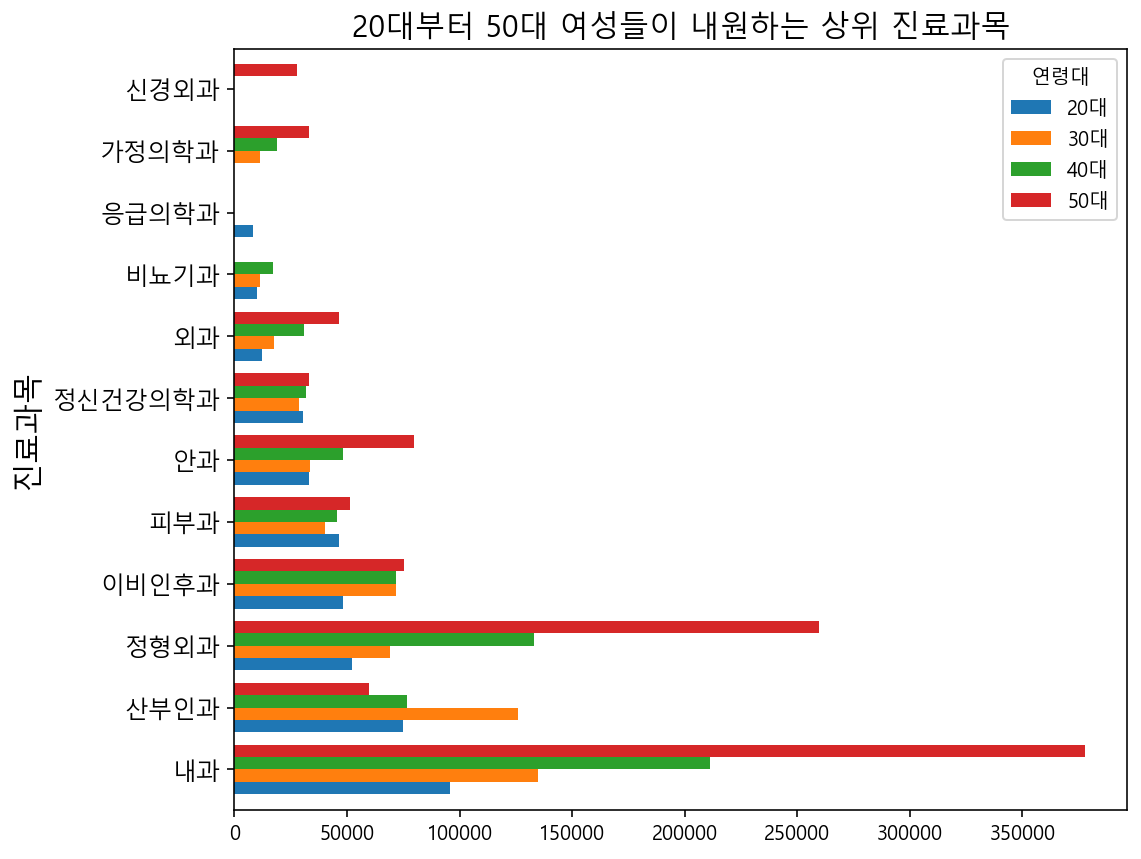

In [70]:
df_bargraph = df_female_ca_2050.sort_values(by='20ÎåÄ', 
                                       ascending=False)
df_bargraph.set_index('ÏßÑÎ£åÍ≥ºÎ™©', inplace=True) #‚ë†

df_bargraph.plot.barh(figsize=(8, 7), width=0.8) #‚ë°
plt.yticks(fontsize=12)
plt.ylabel("ÏßÑÎ£åÍ≥ºÎ™©", fontsize=15) 
plt.title("20ÎåÄÎ∂ÄÌÑ∞ 50ÎåÄ Ïó¨ÏÑ±Îì§Ïù¥ ÎÇ¥ÏõêÌïòÎäî ÏÉÅÏúÑ ÏßÑÎ£åÍ≥ºÎ™©", fontsize=15)

In [71]:
diag_data_s = df_female[df_female['ÏßÑÎ£åÍ≥ºÎ™©']=='Ï†ïÌòïÏô∏Í≥º'] #‚ë†

diag_data_s_ca = pd.pivot_table(data=diag_data_s, values = 'ÏßÑÎ£åÍ≥ºÎ™©',
                                aggfunc='count', index='ÏßÑÎã®Î≥ëÎ™Ö', columns='Ïó∞Î†πÎåÄ') #‚ë°
diag_data_s_ca.sort_values(by='30ÎåÄ', ascending=False)[:15].style.background_gradient(cmap='summer') 